In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
from matplotlib import pyplot as plt

from orthogonal_dfa.experiments.train_gate import (
    plot_linear_psam_gate,
    plot_pdfa,
)
from orthogonal_dfa.experiments.gate_experiments import (
    train_mll,
    train_psam_linear,
    train_psam_linear_on_others,
    train_psam_linear_with_alternates,
)
from orthogonal_dfa.experiments.pdfa_residual import (
    plot_residuals,
    no_orf,
)
from orthogonal_dfa.experiments.trained_models import (
    pdfa_models_basic,
    r_pdfa_cp,
    r_psam_lin,
)

In [4]:
gates_mll, _, results_mll = train_mll()
gates_psams_orig, _, results_psam_orig = train_psam_linear(11)
gates_psams, _, results_psam = train_psam_linear_with_alternates(10)

Training Gates: 100%|##########| 10/10 [00:11<00:00,  1.11s/it]

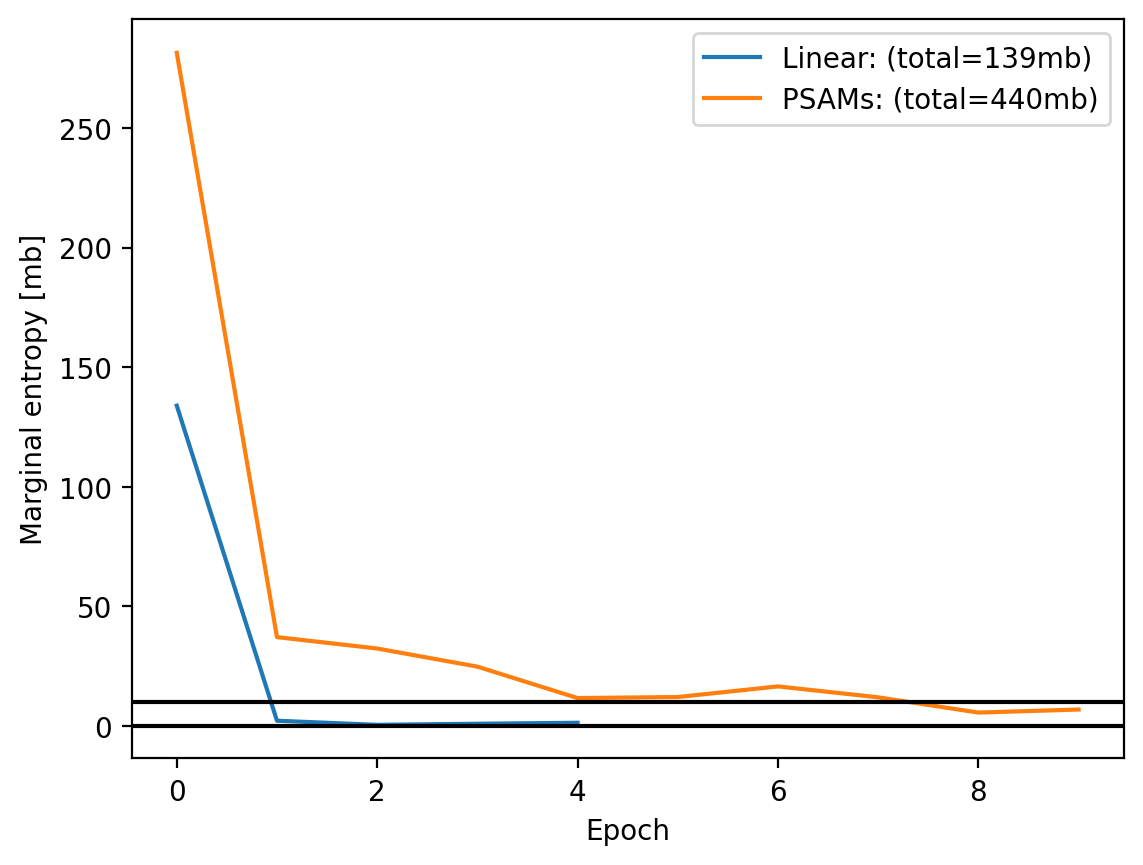

In [5]:
plt.figure(dpi=200)
plt.plot(results_mll * 1000, label=f"Linear: (total={results_mll.sum() * 1000:.0f}mb)")
plt.plot(results_psam * 1000, label=f"PSAMs: (total={results_psam.sum() * 1000:.0f}mb)")
plt.axhline(0, color="black")
plt.axhline(10, color="black")
plt.xlabel("Epoch")
plt.ylabel("Marginal entropy [mb]")
plt.legend()
plt.show()

In [6]:
def plot_all_psams(gates_trained):
    _, axs = plt.subplots(
        len(gates_trained), 3, figsize=(10, 3 * len(gates_trained)), tight_layout=True
    )
    for g, axs_row in zip(gates_trained, axs):
        plot_linear_psam_gate(g, *axs_row)

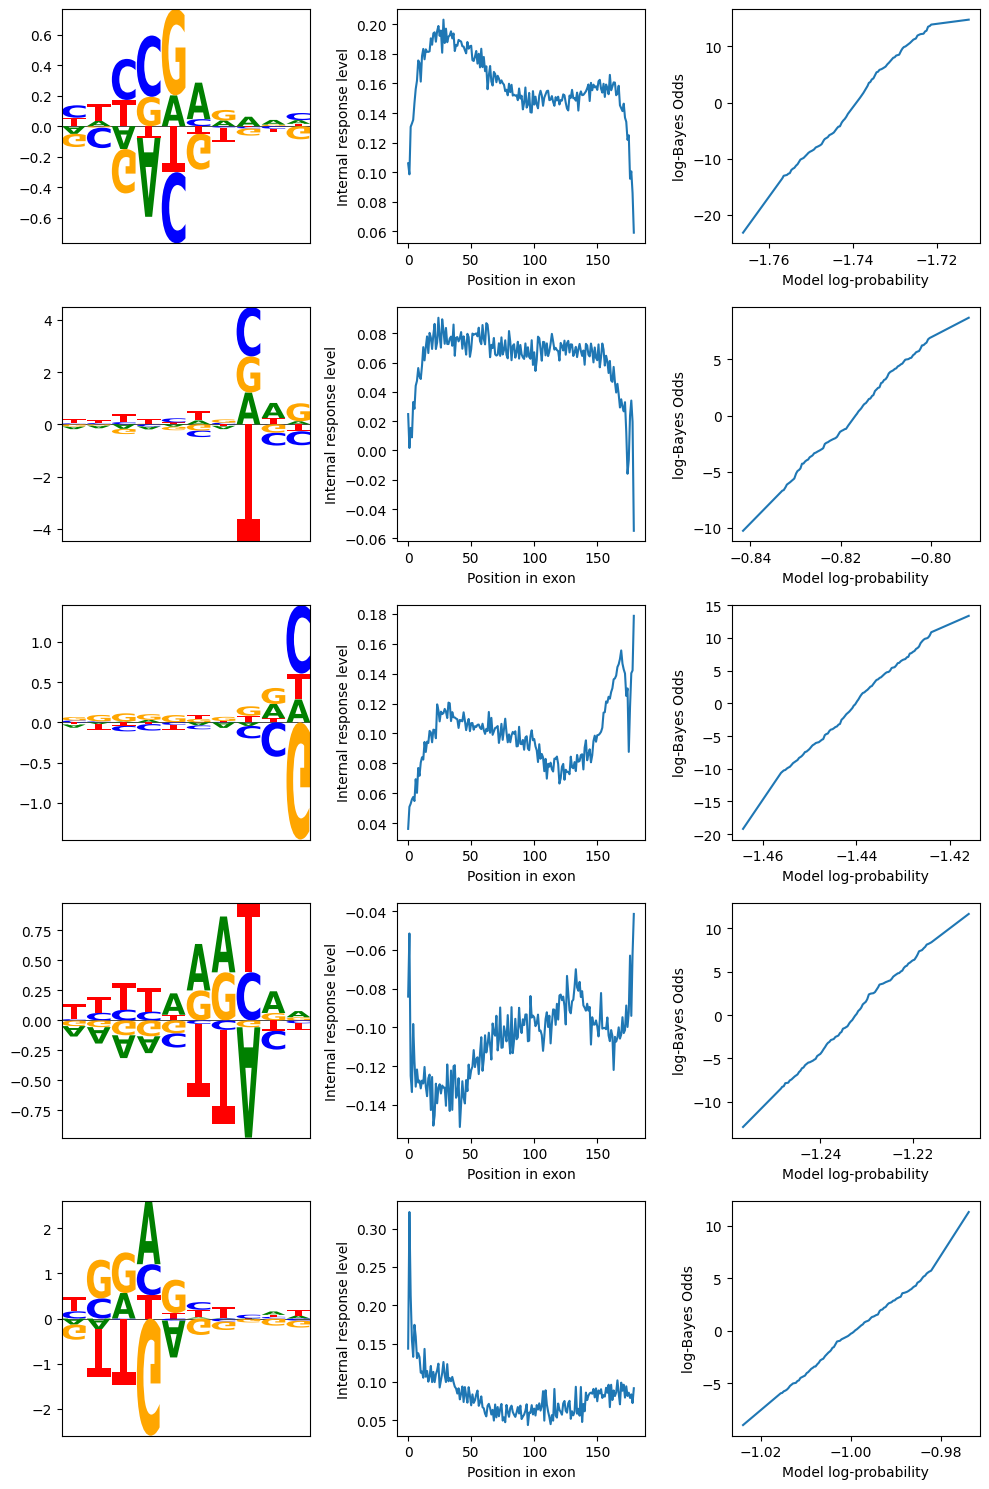

In [7]:
plot_all_psams(gates_psams[:5])

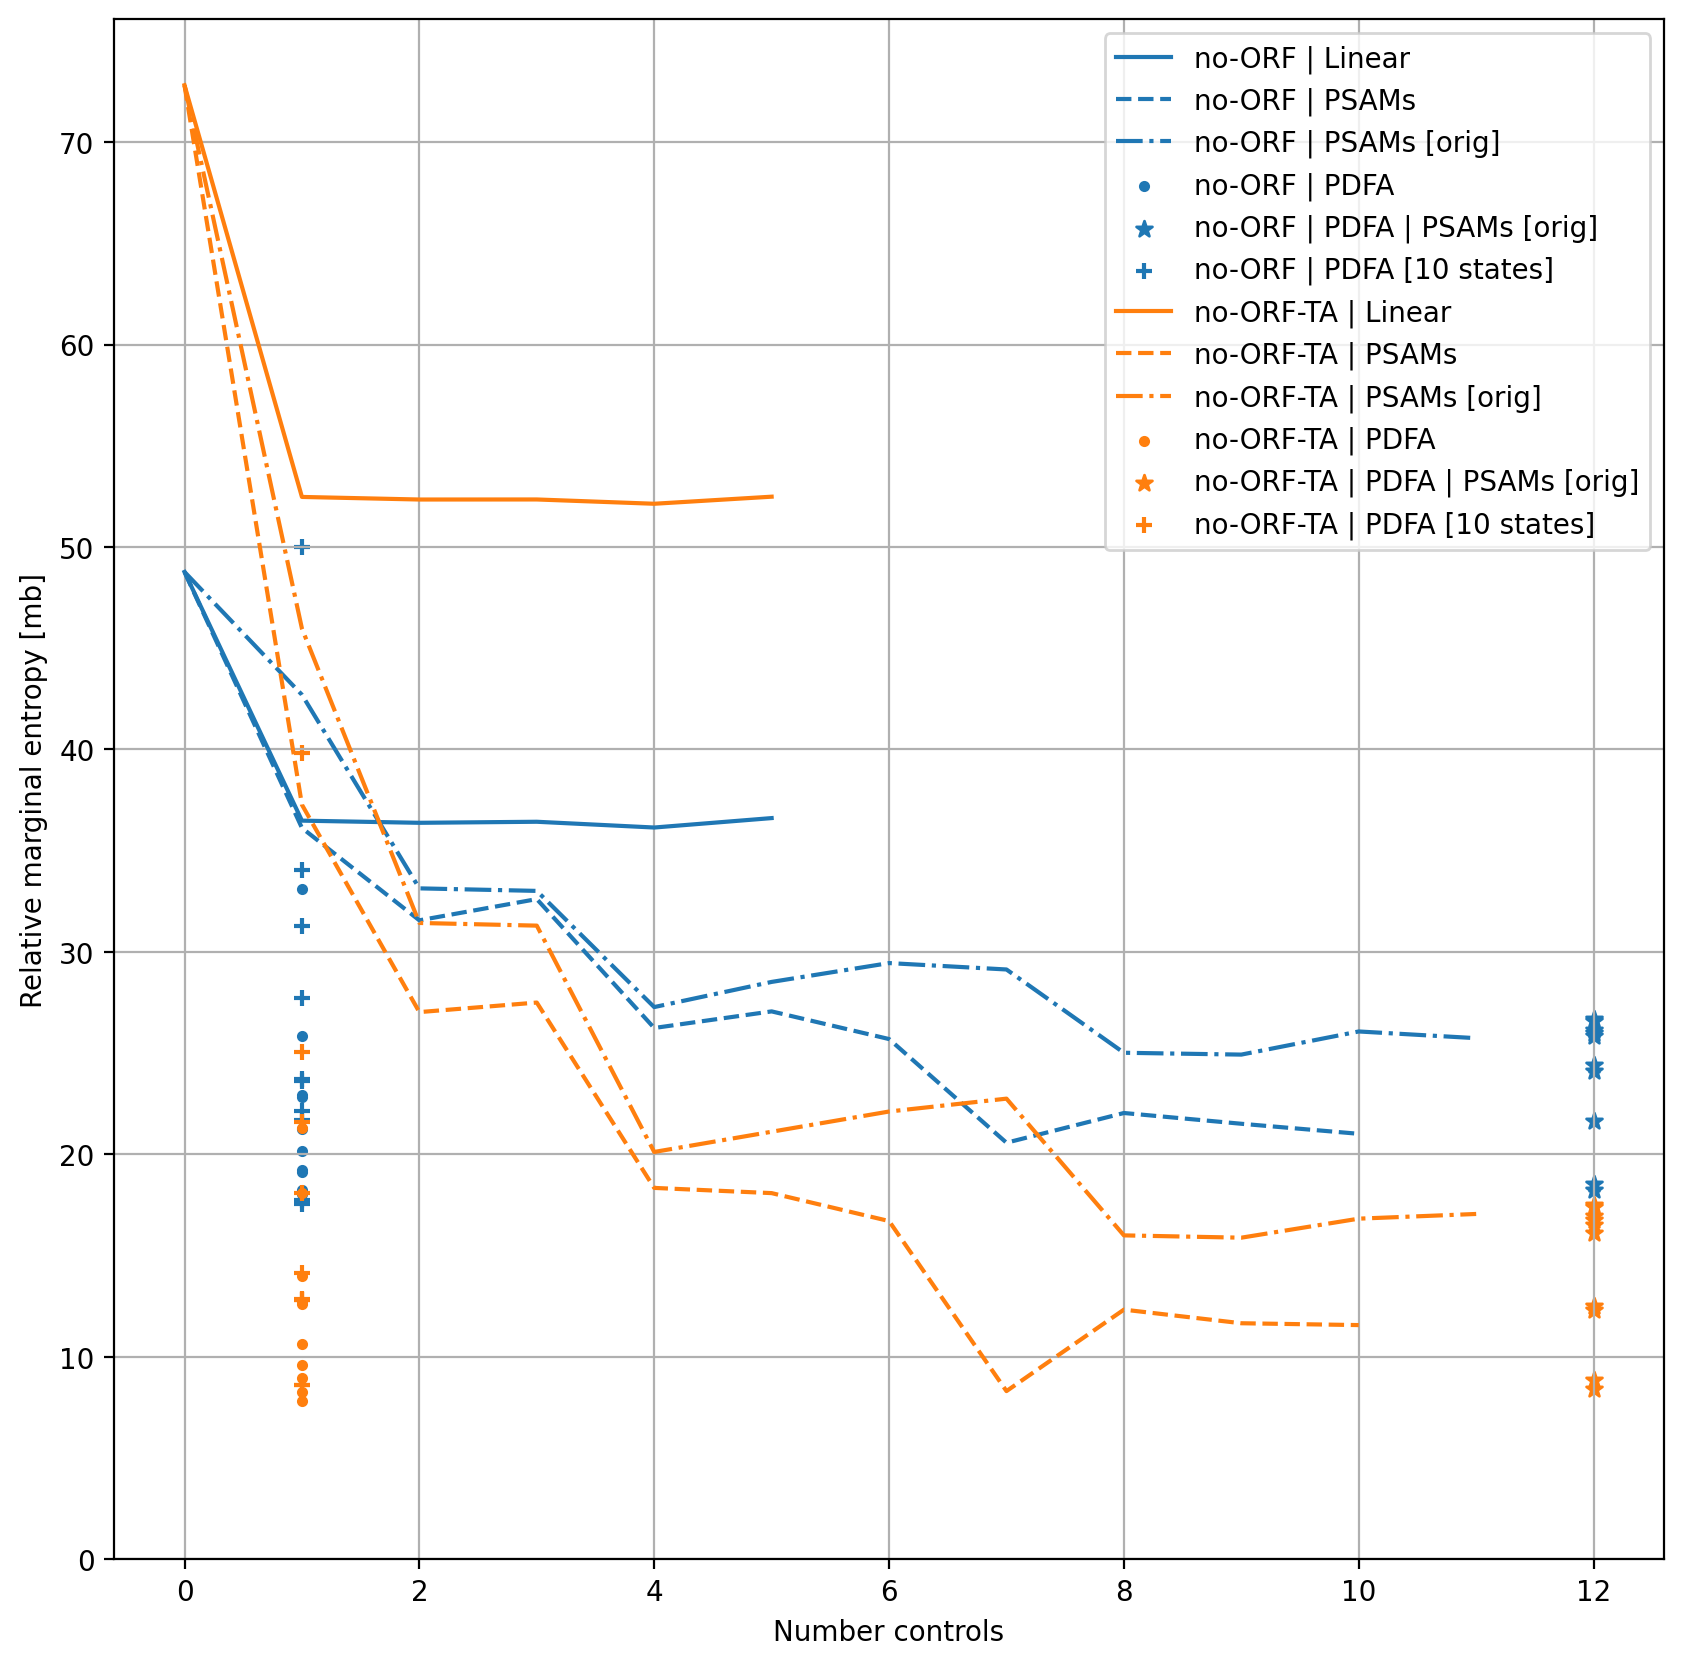

In [8]:
plot_residuals(
    gates_mll,
    gates_psams,
    gates_psams_orig,
    [x.results for x in pdfa_models_basic],
    [x.name for x in pdfa_models_basic],
)

1 0.31779966 4@32%
2 0.4639168 4@46%
3 0.120624535 4@12%


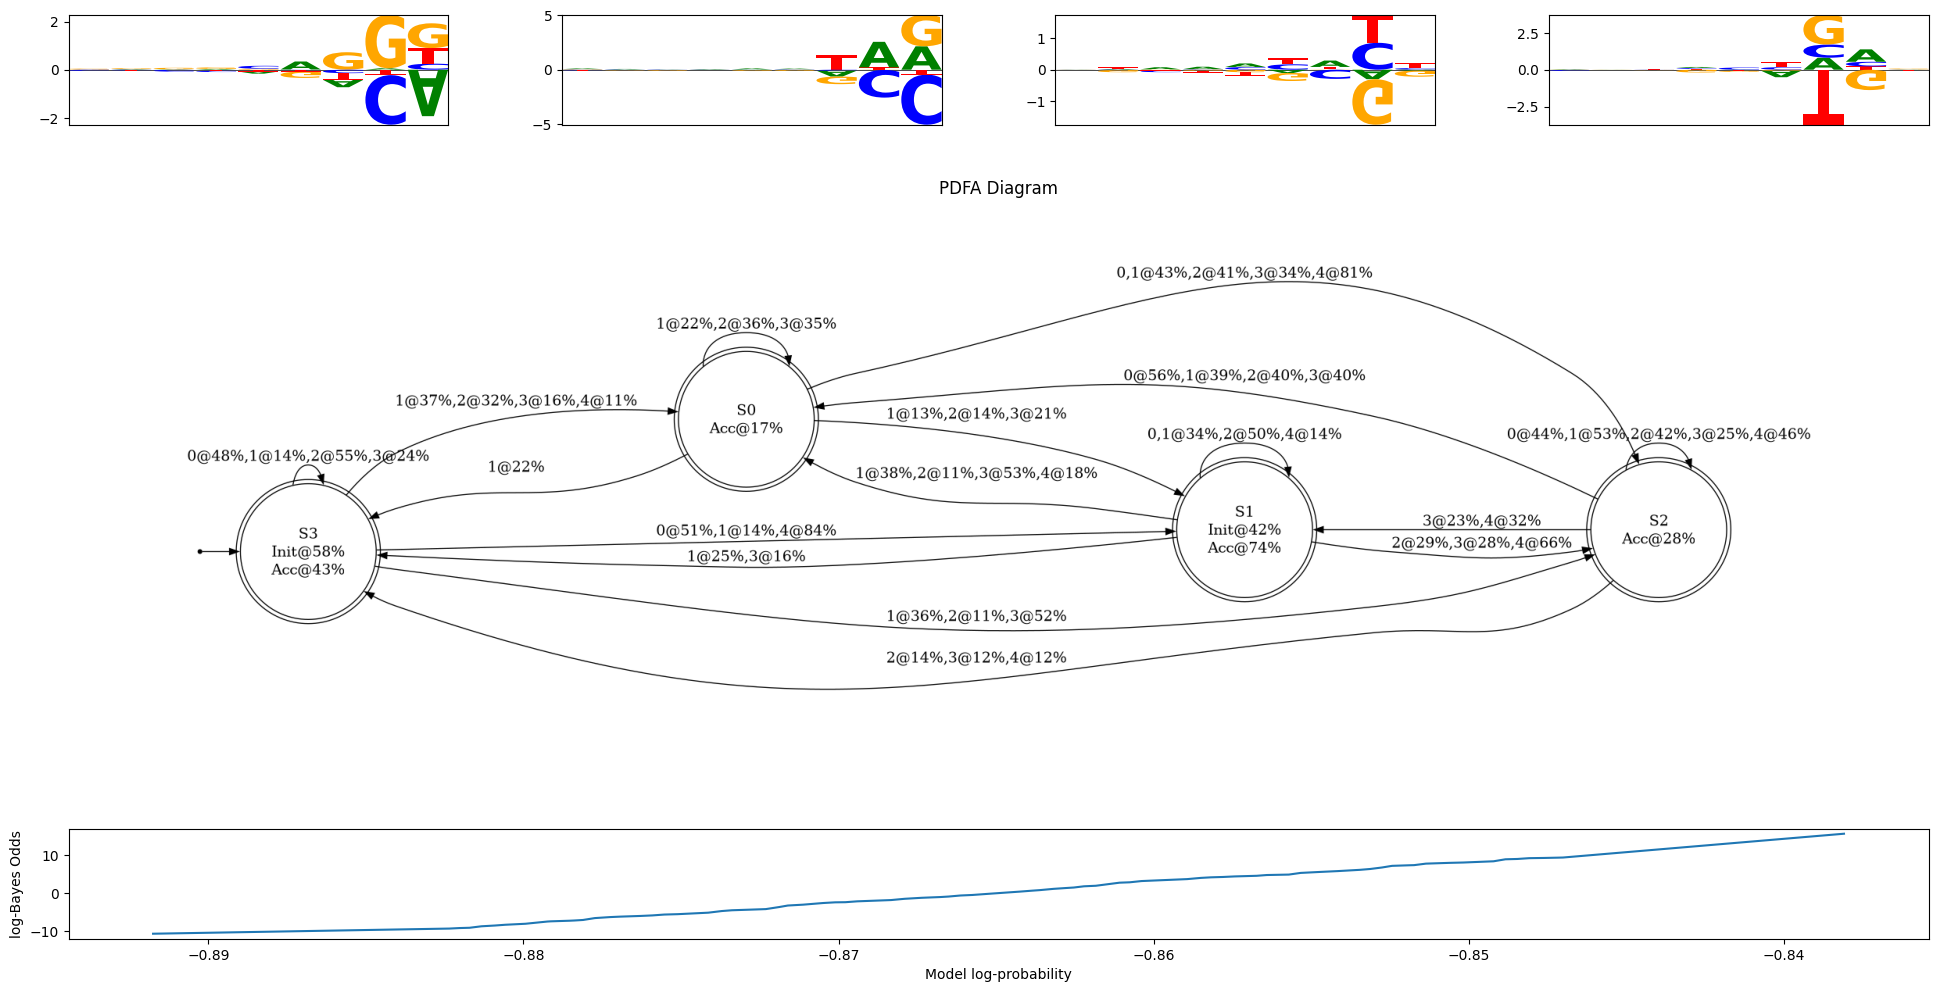

In [9]:
plot_pdfa(r_pdfa_cp.results["last_gates"][0])

0 0.36549264 4@37%
1 0.16271937 4@16%
2 0.1878051 4@19%
3 0.2839829 4@28%


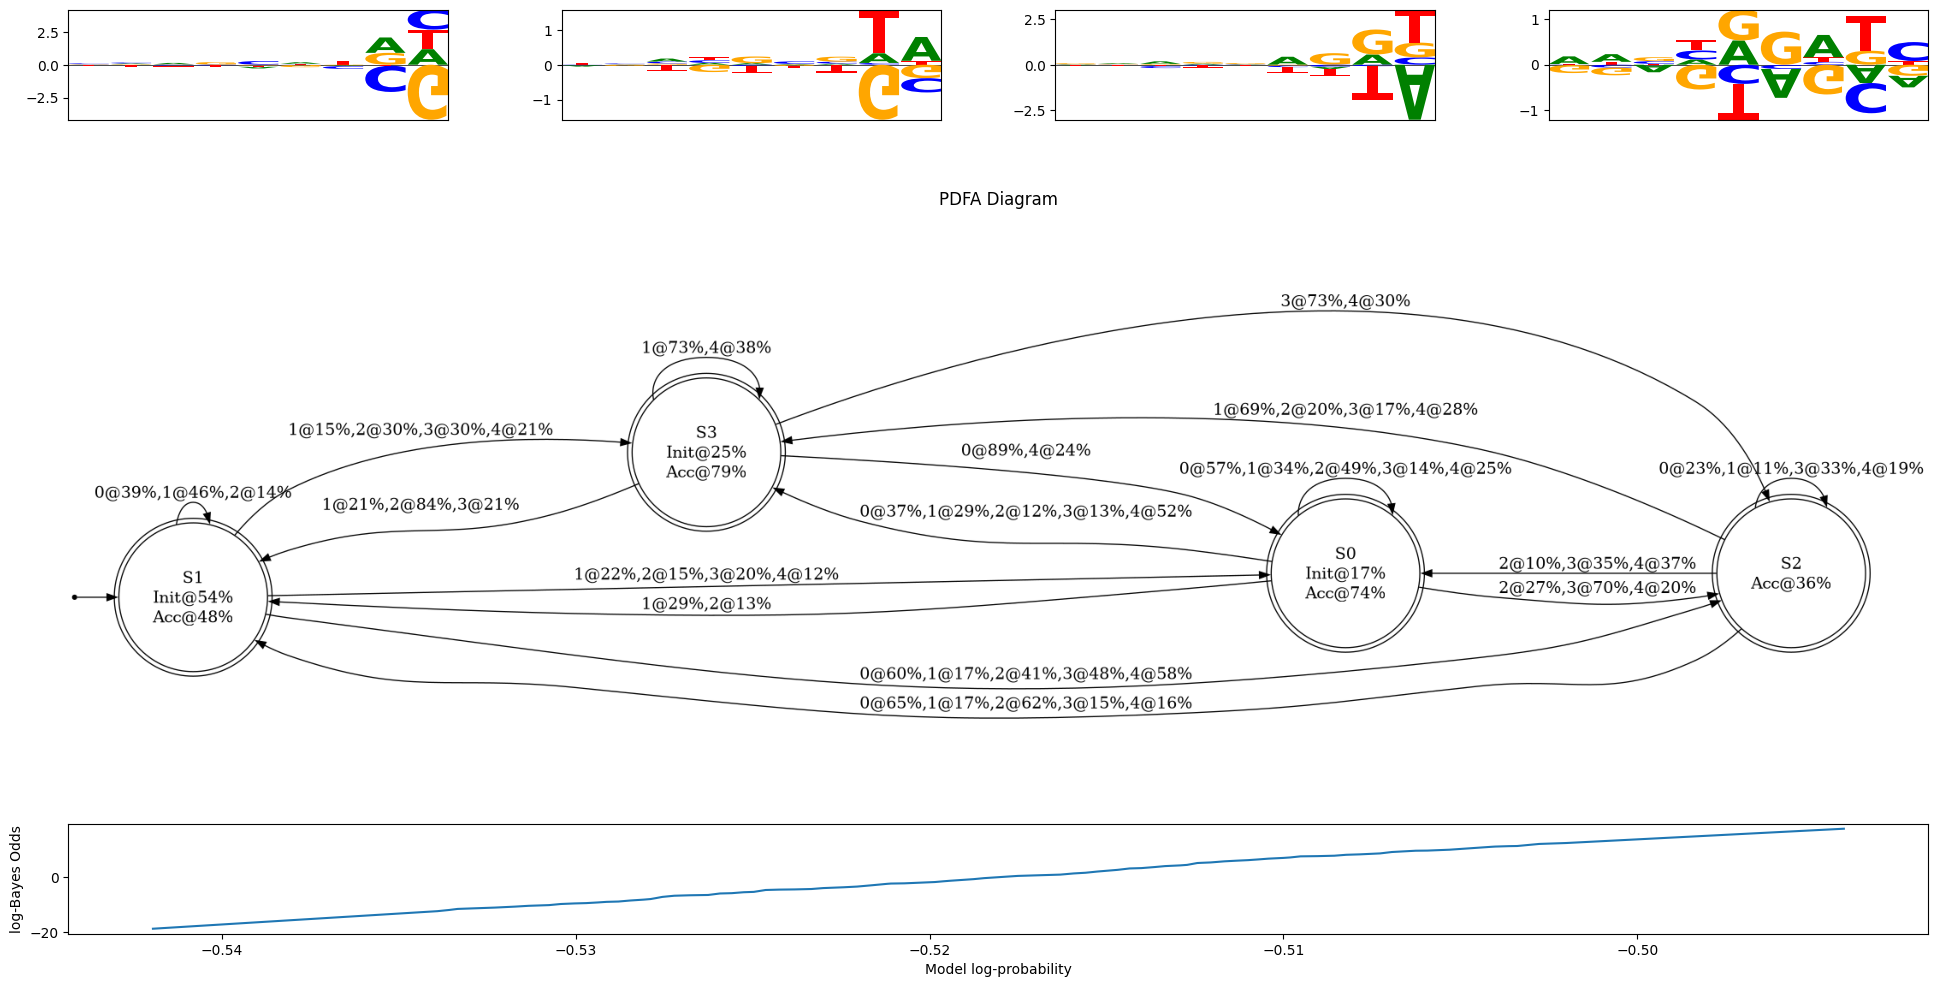

In [10]:
plot_pdfa(r_pdfa_cp.results["last_gates"][1])

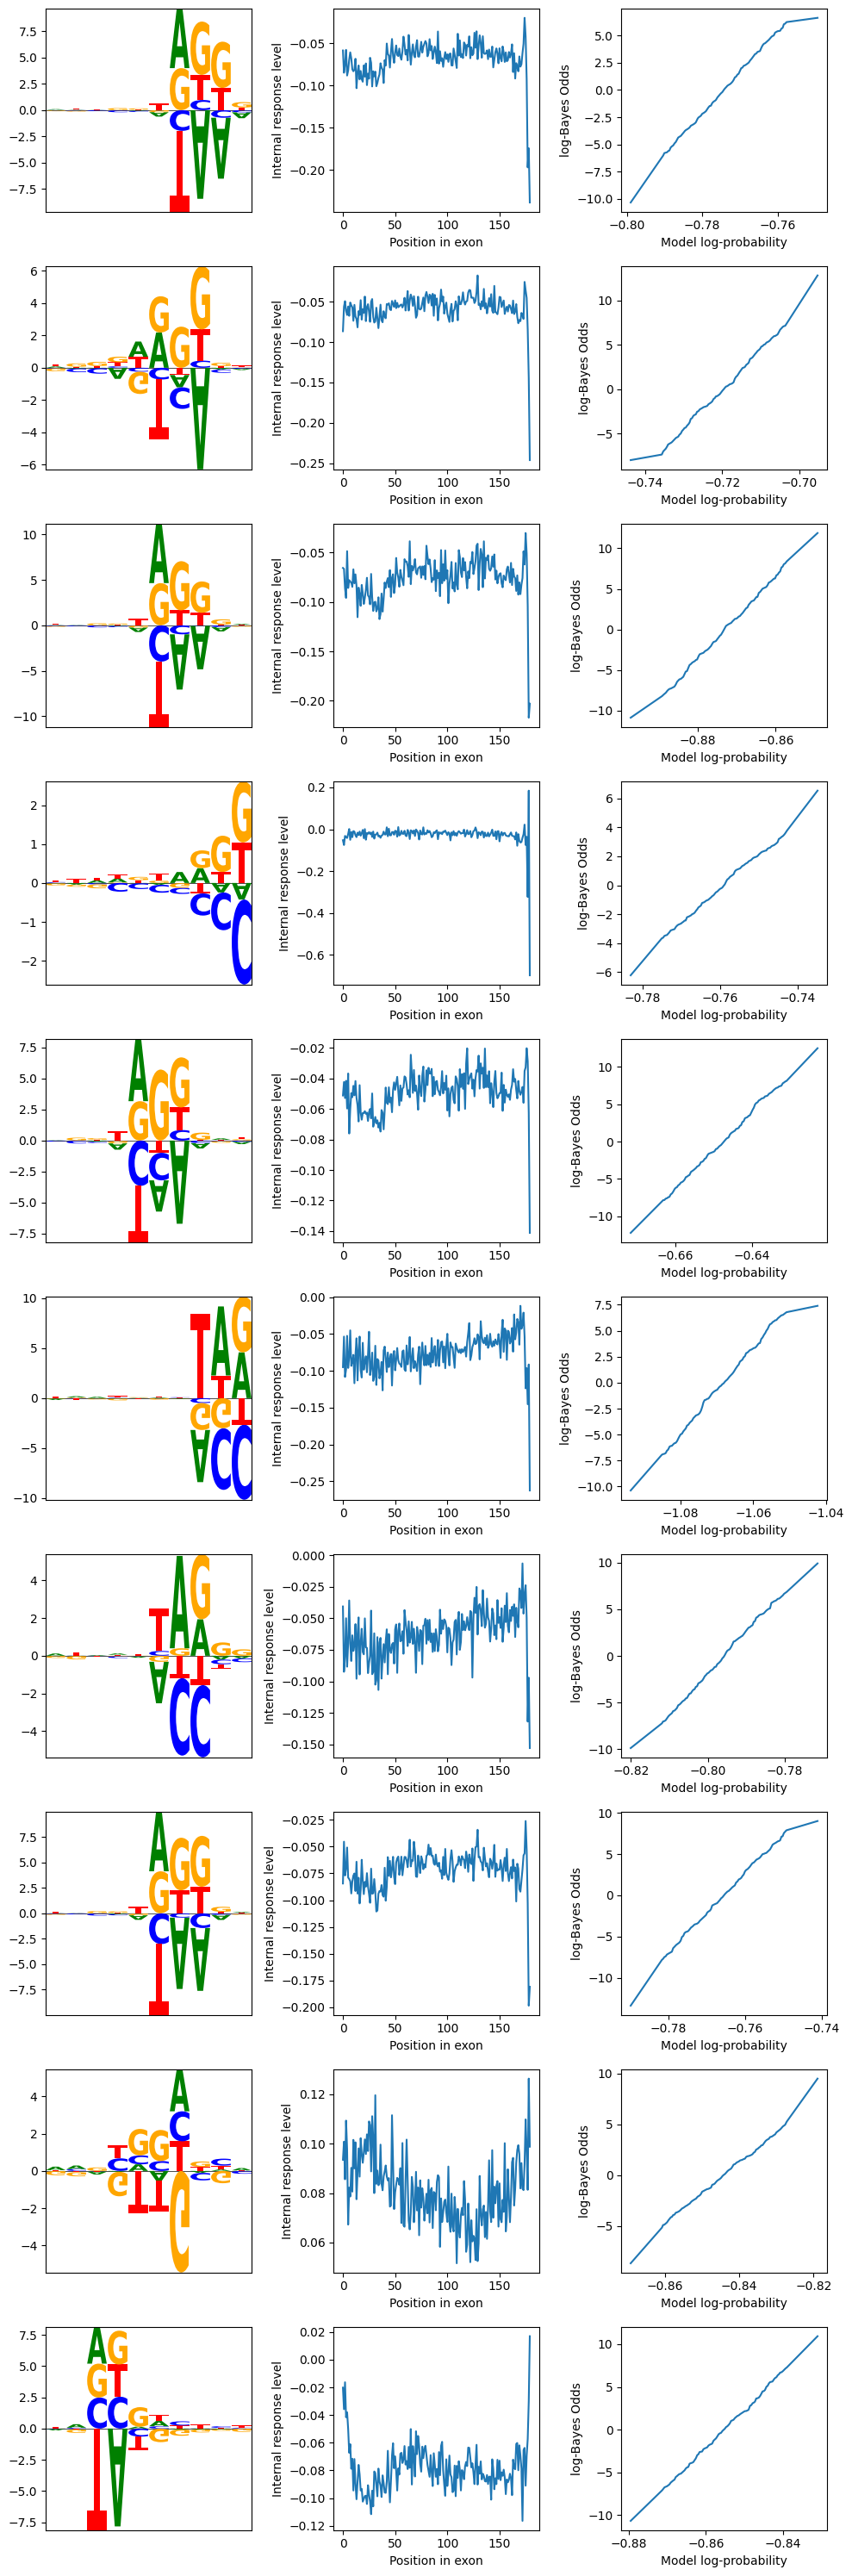

In [11]:
plot_all_psams(r_psam_lin.results["last_gates"])